In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
heart=pd.read_csv("heart.csv")

In [ ]:
heart.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart['FastingBS'].unique


<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64>

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart.shape

(918, 12)

In [ ]:
heart.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**Some of the Colums are in object form so, we need to convert in numerical form for making prediction**

In [ ]:
heart['Sex'].replace(to_replace=['M','F'],value=[1,2],inplace=True)
heart['ChestPainType'].replace(to_replace=['ATA','NAP','ASY','TA'],value=[1,2,3,4],inplace=True)
heart['RestingECG'].replace(to_replace=['Normal','ST','LVH'],value=[1,2,3],inplace=True)
heart['ExerciseAngina'].replace(to_replace=['N','Y'],value=[1,2],inplace=True)
heart['ST_Slope'].replace(to_replace=['Up','Flat','Down'],value=[1,2,3],inplace=True)

In [ ]:
print(heart.Sex.unique())
print(heart.ChestPainType.unique())
print(heart.RestingECG.unique())
print(heart.ExerciseAngina.unique())
print(heart.ST_Slope.unique())

[1 2]
[1 2 3 4]
[1 2 3]
[1 2]
[1 2 3]


In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,2.452070,132.396514,198.799564,0.233115,1.603486,136.809368,1.404139,0.887364,1.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,1.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,1.000000,120.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,1.000000,138.000000,1.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,2.000000,1.500000,2.000000,1.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,2.000000,6.200000,3.000000,1.000000


In [ ]:
#Refining the peoples which are not a patient of heart disease
heart[heart["HeartDisease"]==0].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,1.348780,2.017073,130.180488,227.121951,0.107317,1.548780,148.151220,1.134146,0.408049,1.260976,0.0
std,9.444915,0.477167,0.934114,16.499585,74.634659,0.309894,0.805732,23.288067,0.341226,0.699709,0.511663,0.0
min,28.000000,1.000000,1.000000,80.000000,0.000000,0.000000,1.000000,69.000000,1.000000,-1.100000,1.000000,0.0
25%,43.000000,1.000000,1.000000,120.000000,197.250000,0.000000,1.000000,134.000000,1.000000,0.000000,1.000000,0.0
50%,51.000000,1.000000,2.000000,130.000000,227.000000,0.000000,1.000000,150.000000,1.000000,0.000000,1.000000,0.0
75%,57.000000,2.000000,3.000000,140.000000,266.750000,0.000000,2.000000,165.000000,1.000000,0.600000,1.000000,0.0
max,76.000000,2.000000,4.000000,190.000000,564.000000,1.000000,3.000000,202.000000,2.000000,4.200000,3.000000,0.0


In [ ]:
#Refining the peoples which are the patient of heart disease
heart[heart["HeartDisease"]==1].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,1.098425,2.803150,134.185039,175.940945,0.334646,1.647638,127.655512,1.622047,1.274213,1.942913,1.0
std,8.727056,0.298182,0.576179,19.828685,126.391398,0.472332,0.804238,23.386923,0.485354,1.151872,0.497220,0.0
min,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,1.000000,-2.600000,1.000000,1.0
25%,51.000000,1.000000,3.000000,120.000000,0.000000,0.000000,1.000000,112.000000,1.000000,0.000000,2.000000,1.0
50%,57.000000,1.000000,3.000000,132.000000,217.000000,0.000000,1.000000,126.000000,2.000000,1.200000,2.000000,1.0
75%,62.000000,1.000000,3.000000,145.000000,267.000000,1.000000,2.000000,144.250000,2.000000,2.000000,2.000000,1.0
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,3.000000,195.000000,2.000000,6.200000,3.000000,1.0


In [ ]:
heart.drop_duplicates(inplace=True)

In [ ]:
heart.shape

(918, 12)

In [ ]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart.isna().all()


Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
len(heart[heart["Cholesterol"]==0])

172

There are 172 patients available in data their cholesterol  is 0 which is invalid.

In [ ]:
mean_value=heart['Cholesterol'].mean()
mean_value

198.7995642701525

In [ ]:
heart.loc[heart['Cholesterol']==0, 'Cholesterol']==mean_value
heart['Cholesterol'].fillna(mean_value,inplace=True)

In [ ]:
len(heart[heart["RestingBP"]==0])

1

There is one patient available thier Resting blood pressure is 0 which is also inavalid

In [ ]:
len(heart[heart['MaxHR']==0])

0

In [ ]:
len(heart[heart['RestingECG']==0])

0

In [ ]:
heart.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
heart["RestingECG"].value_counts()

1    552
3    188
2    178
Name: RestingECG, dtype: int64

In [ ]:
heart["Sex"].value_counts()

1    725
2    193
Name: Sex, dtype: int64

In [ ]:
heart["ChestPainType"].value_counts()

3    496
2    203
1    173
4     46
Name: ChestPainType, dtype: int64

In [ ]:
#Number and percentage of male who are diagnosed to have heart disease
male_n=len(heart[(heart['Sex']==1) & (heart['HeartDisease']==1)])
male_p=round(len(heart[(heart['Sex']==1) & (heart["HeartDisease"]==1)])/len(heart[heart['Sex']==1])*100,2)
print(male_n,'Males who are diagnosed to have heart disease among 725 males')
print(male_p ,'%')

458 Males who are diagnosed to have heart disease among 725 males
63.17 %


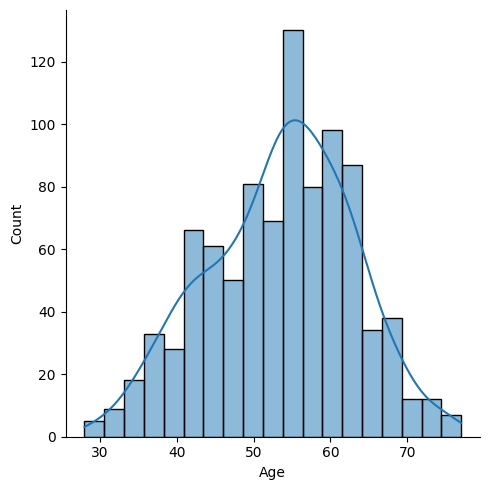

In [ ]:
sns.displot(heart['Age'],kde=True)

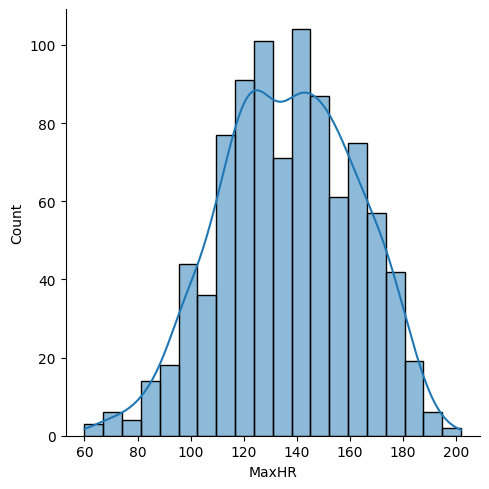

In [ ]:
sns.displot(heart['MaxHR'],kde=True)

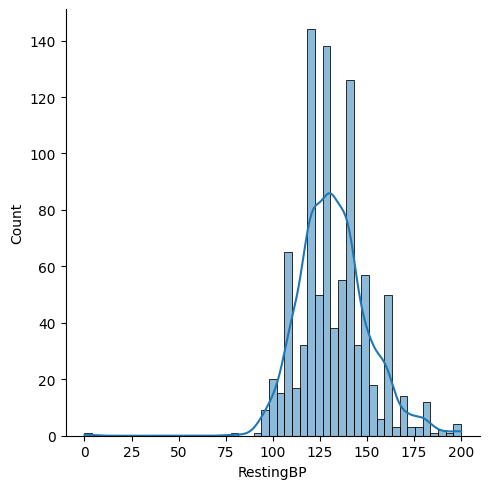

In [ ]:
sns.displot(heart['RestingBP'],kde=True)

<Axes: ylabel='None'>

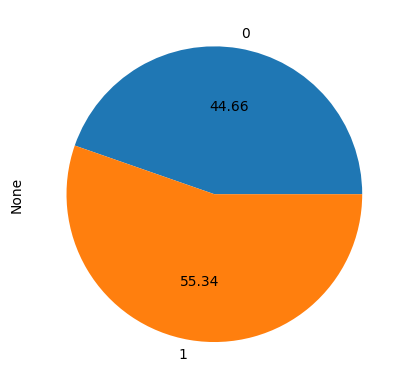

In [ ]:
heart.groupby(["HeartDisease"]).size().plot(kind="pie",autopct="%.2f")

<Axes: ylabel='None'>

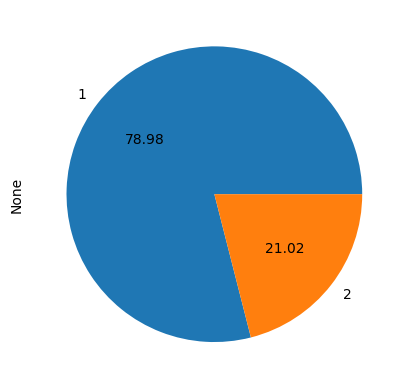

In [ ]:
heart.groupby(["Sex"]).size().plot(kind="pie",autopct="%.2f")

In [ ]:
heart.Sex.value_counts()

1    725
2    193
Name: Sex, dtype: int64

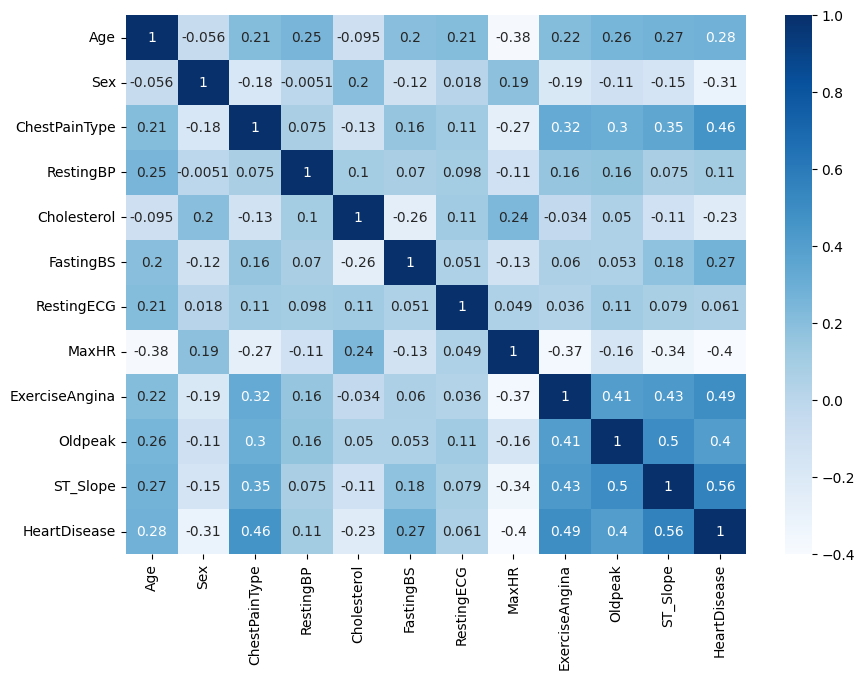

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(heart.corr(),annot=True,cmap="Blues")
plt.show()

<Axes: ylabel='None'>

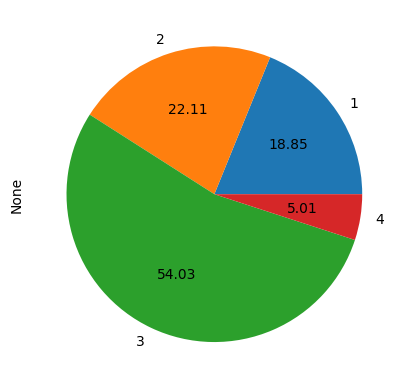

In [ ]:
heart.groupby("ChestPainType").size().plot(kind="pie",autopct="%.2f")

<Axes: ylabel='None'>

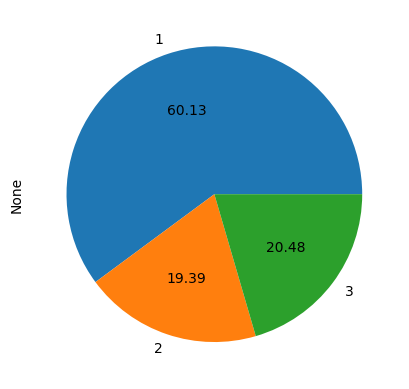

In [ ]:
heart.groupby("RestingECG").size().plot(kind="pie",autopct="%.2f")

In [ ]:
#Spilit the data set for giving as a label
X=heart.drop('HeartDisease',axis=1)


In [ ]:
Y=heart['HeartDisease']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)

In [ ]:
xtrain

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
485,63,1,1,139,217,1,2,128,2,1.2,2
486,55,1,1,110,214,1,2,180,1,0.4,1
117,59,2,3,130,338,1,2,130,2,1.5,2
361,47,1,3,160,0,0,1,124,2,0.0,2
296,50,1,3,145,0,1,1,139,2,0.7,2
...,...,...,...,...,...,...,...,...,...,...,...
276,51,1,2,135,160,0,1,150,1,2.0,2
201,46,1,2,120,230,0,1,150,1,0.0,1
462,59,1,3,122,233,0,1,117,2,1.3,3
252,61,1,3,125,292,0,2,115,2,0.0,1


In [ ]:
xtest

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
356,46,1,3,115,0,0,1,113,2,1.5,2
763,58,1,2,132,224,0,3,173,1,3.2,1
817,60,1,3,125,258,0,3,141,2,2.8,2
735,49,1,2,120,188,0,1,139,1,2.0,2
892,39,2,2,138,220,0,1,152,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
52,45,1,1,140,224,1,1,122,1,0.0,1
752,56,1,3,125,249,1,3,144,2,1.2,2
492,49,1,4,130,0,0,2,145,1,3.0,2
622,59,1,3,110,239,0,3,142,2,1.2,2


In [ ]:
ytrain


485    1
486    0
117    1
361    1
296    1
      ..
276    1
201    0
462    1
252    0
62     0
Name: HeartDisease, Length: 734, dtype: int64

In [ ]:
ytest

356    1
763    1
817    1
735    1
892    0
      ..
52     0
752    1
492    1
622    1
316    1
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
#Orignal Data, traning data set and test data set
print(X.shape,xtrain.shape,xtest.shape)

(918, 11) (734, 11) (184, 11)


In [ ]:

model=LogisticRegression()

In [ ]:
#Here we training the logistic regression model with training data
model.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Accuracy on training Data
xtrain_pridiction=model.predict(xtrain)


In [ ]:
training_accuracy=accuracy_score( xtrain_pridiction ,ytrain)

In [ ]:
print("Traing data Accuracy :",training_accuracy)

Traing data Accuracy : 0.8501362397820164


**Model give the 85% accuracy on train data**

In [ ]:
#Accuracy on test Data
xtest_prediction=model.predict(xtest)

In [ ]:
test_accuracy=accuracy_score(xtest_prediction,ytest)

In [ ]:
print("Test data  Accuracy :",test_accuracy)

Test data  Accuracy : 0.8641304347826086


**Model give the 86% Accuracy on Test data**